# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set(style='whitegrid')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [51]:
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [52]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [53]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [54]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [55]:
print("Informasi Dataset :")
print(df.info())

Informasi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Acco

In [56]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

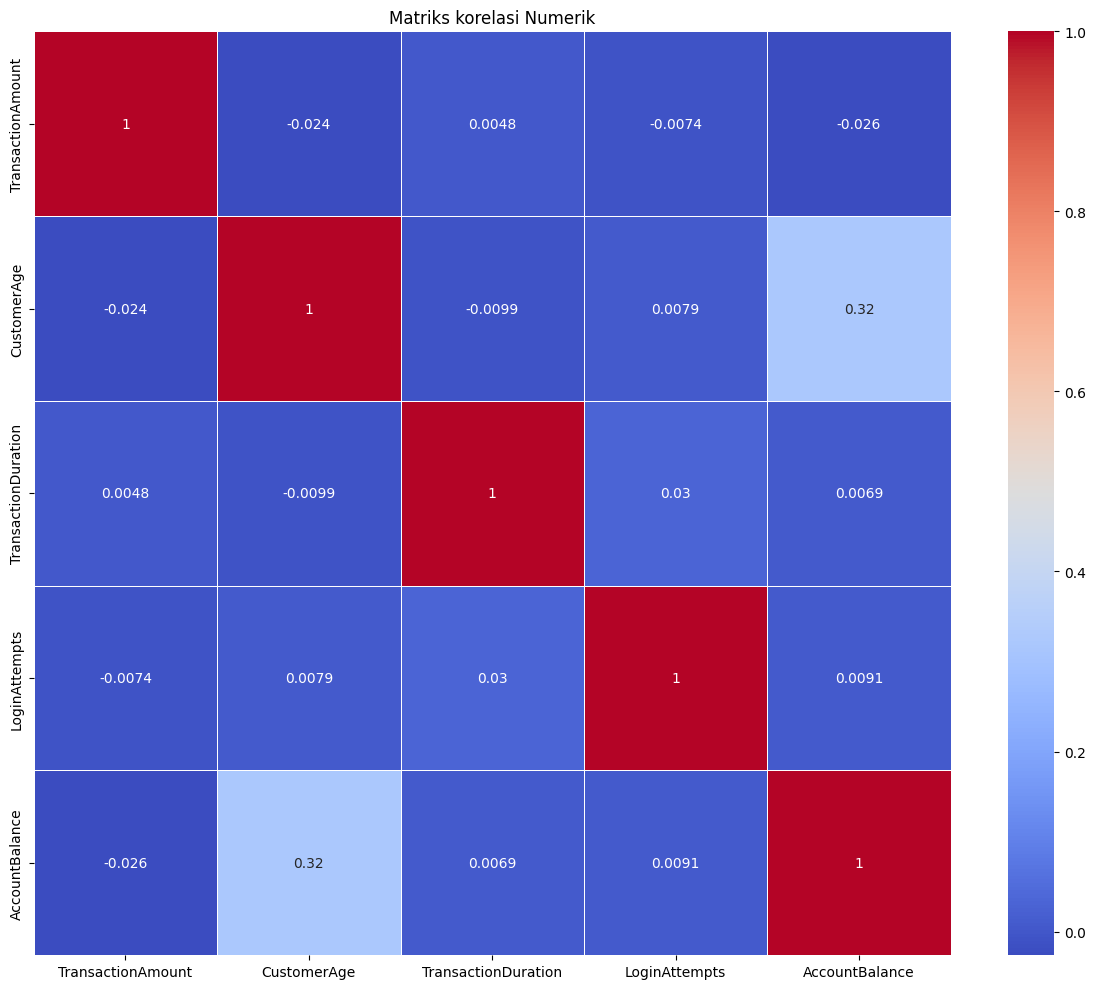

In [57]:
# Matriks korelasi Numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks korelasi Numerik')
plt.tight_layout()
plt.show()

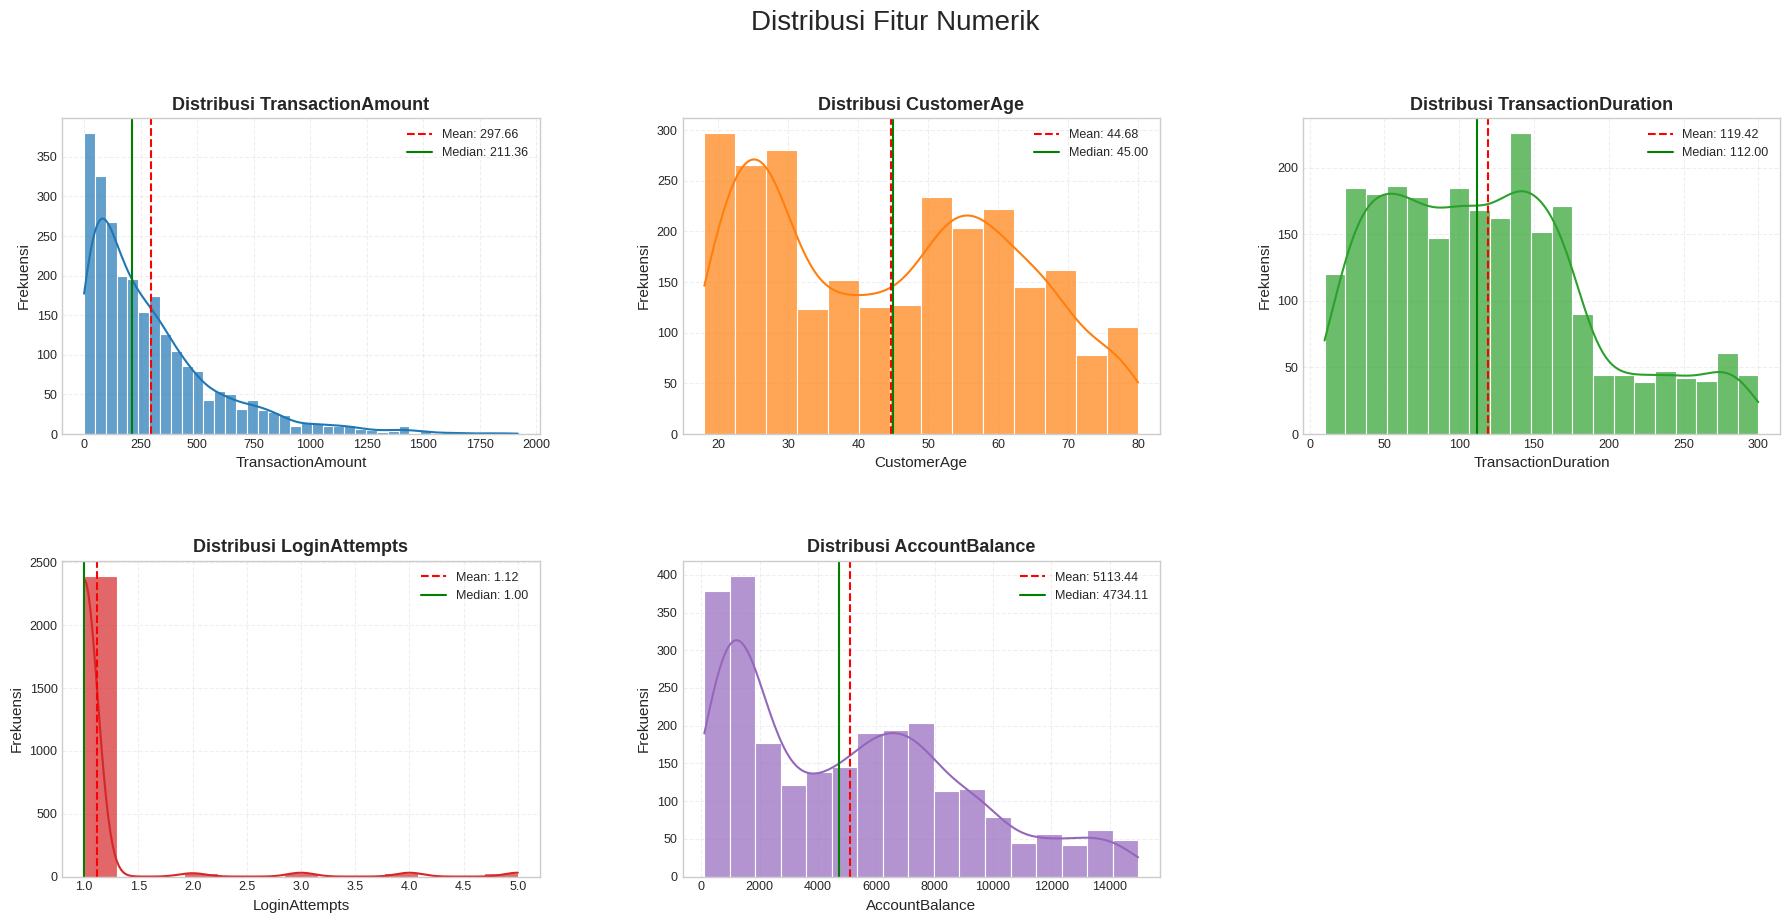

In [58]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_cols)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4.5))
axes = axes.flatten() if rows > 1 else [axes]
colors = plt.cm.tab10.colors

for i, col in enumerate(num_cols):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i], color=colors[i % len(colors)],
                    alpha=0.7, edgecolor='white', linewidth=0.8)

        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5,
                        label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='-', linewidth=1.5,
                        label=f'Median: {median_val:.2f}')

        axes[i].set_title(f'Distribusi {col}', fontsize=13, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=11)
        axes[i].set_ylabel('Frekuensi', fontsize=11)
        axes[i].tick_params(axis='both', labelsize=9)
        axes[i].legend(fontsize=9)
        axes[i].grid(True, alpha=0.3, linestyle='--')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribusi Fitur Numerik', fontsize=20, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
plt.style.use('default')

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [60]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [61]:
# Mengecek dataset menggunakan duplicated().sum()
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 21


In [63]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Data setelah scaling:")
df_scaled[numerical_cols].head()

Data setelah scaling:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,-0.972736,NaN,1.121495,-0.204629,0.594263


In [64]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df_cleaned = df_scaled.drop(columns=id_columns)
print("Data setelah menghapus kolom dengan keterangan id dan IP Address:")
df_cleaned.head()

Data setelah menghapus kolom dengan keterangan id dan IP Address:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [65]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
df_encoded = df_cleaned.copy()
print("Data setelah encoding fitur kategorikal:")
df_encoded.head()

Data setelah encoding fitur kategorikal:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [66]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_encoded.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [67]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
missing_values = df_encoded.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values[missing_values > 0])

Jumlah nilai yang hilang di setiap kolom:
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [68]:
if df_encoded.isnull().sum().sum() > 0:
    rows_before = df_encoded.shape[0]
    df_encoded = df_encoded.dropna()
    rows_after = df_encoded.shape[0]
    print(f"\nJumlah baris sebelum dropna: {rows_before}")
    print(f"Jumlah baris setelah dropna: {rows_after}")
    print(f"Jumlah baris yang dihapus: {rows_before - rows_after}")
    print(f"Persentase data yang dihapus: {((rows_before - rows_after) / rows_before) * 100:.2f}%")
else:
    print("\nTidak ada nilai yang hilang dalam dataset.")


Jumlah baris sebelum dropna: 2537
Jumlah baris setelah dropna: 2265
Jumlah baris yang dihapus: 272
Persentase data yang dihapus: 10.72%


In [76]:
missing_values = df_encoded.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values[missing_values > 0])

Jumlah nilai yang hilang di setiap kolom:
Series([], dtype: int64)


In [72]:
print("Sudah tidak ada data yang hilang?", df_encoded.isnull().sum().sum() == 0)

Sudah tidak ada data yang hilang? True


In [73]:
# Menghapus data duplikat menggunakan drop_duplicates().
duplicates = df_encoded.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 22


In [74]:
if duplicates > 0:
    df_encoded = df_encoded.drop_duplicates()
    print(f"Data duplikat telah dihapus. Ukuran dataset sekarang: {df_encoded.shape}")
else:
    print("Tidak ada data duplikat dalam dataset.")

Data duplikat telah dihapus. Ukuran dataset sekarang: (2243, 11)


In [75]:
duplicates = df_encoded.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [78]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_idx = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers_idx, lower_bound, upper_bound


In [79]:
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

In [80]:
all_outliers_idx = set()
outlier_info = {}

In [82]:
for col in numeric_cols:
    outliers_idx, lower, upper = detect_outliers(df_encoded, col)
    outlier_count = len(outliers_idx)
    percentage = (outlier_count / len(df_encoded)) * 100
    print(f"Kolom {col}: {outlier_count} outlier ({percentage:.2f}%)")
    print(f"  Batas bawah: {lower:.2f}, Batas atas: {upper:.2f}")
    outlier_info[col] = {
        'count': outlier_count,
        'percentage': percentage,
        'lower': lower,
        'upper': upper,
        'indices': outliers_idx
    }
    all_outliers_idx.update(outliers_idx)
print(f"\nTotal baris dengan outlier: {len(all_outliers_idx)} dari {len(df_encoded)} ({len(all_outliers_idx)/len(df_encoded)*100:.2f}%)")

Kolom TransactionAmount: 100 outlier (4.46%)
  Batas bawah: -2.44, Batas atas: 2.09
Kolom CustomerAge: 0 outlier (0.00%)
  Batas bawah: -3.68, Batas atas: 3.49
Kolom TransactionDuration: 0 outlier (0.00%)
  Batas bawah: -2.92, Batas atas: 2.73
Kolom LoginAttempts: 108 outlier (4.81%)
  Batas bawah: -0.20, Batas atas: -0.20
Kolom AccountBalance: 0 outlier (0.00%)
  Batas bawah: -3.32, Batas atas: 3.05

Total baris dengan outlier: 204 dari 2243 (9.09%)


In [83]:
# Pilih metode penanganan outlier berdasarkan persentase
if len(all_outliers_idx) / len(df_encoded) < 0.10:  # Jika outlier < 10%
    # Metode DROP: menghapus baris dengan outlier
    print("\nMenggunakan metode DROP untuk menangani outlier")
    df_no_outliers = df_encoded.drop(index=all_outliers_idx)
    print(f"Jumlah baris setelah menghapus outlier: {len(df_no_outliers)} (dihapus {len(all_outliers_idx)} baris)")
else:
    # Metode IMPUTASI: mengganti nilai outlier dengan batas atas/bawah
    print("\nMenggunakan metode IMPUTASI untuk menangani outlier")
    df_no_outliers = df_encoded.copy()
    for col in numeric_cols:
        lower = outlier_info[col]['lower']
        upper = outlier_info[col]['upper']
        # Imputasi nilai outlier
        df_no_outliers.loc[df_no_outliers[col] < lower, col] = lower
        df_no_outliers.loc[df_no_outliers[col] > upper, col] = upper
    print(f"Jumlah baris setelah imputasi outlier: {len(df_no_outliers)}")


Menggunakan metode DROP untuk menangani outlier
Jumlah baris setelah menghapus outlier: 2039 (dihapus 204 baris)


In [84]:
print("\nStatistik setelah penanganan outlier:")
print(df_no_outliers[numeric_cols].describe())


Statistik setelah penanganan outlier:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2039.000000  2039.000000          2039.000000   2.039000e+03   
mean           -0.145692    -0.002567            -0.006099  -2.046294e-01   
std             0.743892     0.995947             1.009418   7.384794e-15   
min            -1.017881    -1.495947            -1.561745  -2.046294e-01   
25%            -0.751754    -0.991288            -0.805299  -2.046294e-01   
50%            -0.338966     0.018031            -0.134489  -2.046294e-01   
75%             0.257908     0.803056             0.607683  -2.046294e-01   
max             2.072523     1.980594             2.577295  -2.046294e-01   

       AccountBalance  
count     2039.000000  
mean        -0.001376  
std          0.998556  
min         -1.285856  
25%         -0.928129  
50%         -0.103510  
75%          0.653368  
max          2.531190  


In [85]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
binning_features = []
if 'TransactionAmount' in df_no_outliers.columns:
    binning_features.append('TransactionAmount')
if 'AccountBalance' in df_no_outliers.columns:
    binning_features.append('AccountBalance')
# Jika kedua kolom tersebut tidak ada, pilih 2 kolom numerik pertama
if len(binning_features) < 2:
    available_num_cols = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns
    for col in available_num_cols:
        if col not in binning_features:
            binning_features.append(col)
            if len(binning_features) == 2:
                break
print(f"Fitur yang akan dilakukan binning: {binning_features}")

Fitur yang akan dilakukan binning: ['TransactionAmount', 'AccountBalance']


In [93]:
#Binning Fitur 1
if len(binning_features) >= 1:
    feature1 = binning_features[0]
    # Tentukan bins berdasarkan kuantil untuk distribusi yang lebih merata
    q1 = df_no_outliers[feature1].quantile(0.2)
    q2 = df_no_outliers[feature1].quantile(0.4)
    q3 = df_no_outliers[feature1].quantile(0.6)
    q4 = df_no_outliers[feature1].quantile(0.8)
    bins1 = [-float('inf'), q1, q2, q3, q4, float('inf')]
    labels1 = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    # Lakukan binning
    bin_col_name1 = f"{feature1}_Bin"
    df_no_outliers[bin_col_name1] = pd.cut(
        df_no_outliers[feature1],
        bins=bins1,
        labels=labels1
    )
    # Tampilkan distribusi hasil binning
    print(f"\nDistribusi {bin_col_name1}:")
    print(df_no_outliers[bin_col_name1].value_counts())
    # Encode hasil binning menggunakan LabelEncoder
    le = LabelEncoder()
    encoded_col_name1 = f"{feature1}_Bin_Encoded"
    df_no_outliers[encoded_col_name1] = le.fit_transform(df_no_outliers[bin_col_name1])
    # Tampilkan mapping hasil encoding
    print(f"\nMapping LabelEncoder untuk {bin_col_name1}:")
    for i, category in enumerate(le.classes_):
        print(f"{category} -> {i}")
    # Tampilkan sampel hasil
    print(f"\nSampel hasil binning dan encoding untuk {feature1}:")
    print(df_no_outliers[[feature1, bin_col_name1, encoded_col_name1]].head())


Distribusi TransactionAmount_Bin:
TransactionAmount_Bin
Very Low     408
Low          408
High         408
Very High    408
Medium       407
Name: count, dtype: int64

Mapping LabelEncoder untuk TransactionAmount_Bin:
High -> 0
Low -> 1
Medium -> 2
Very High -> 3
Very Low -> 4

Sampel hasil binning dan encoding untuk TransactionAmount:
   TransactionAmount TransactionAmount_Bin  TransactionAmount_Bin_Encoded
0          -0.970546              Very Low                              4
1           0.268963                  High                              0
2          -0.586526                   Low                              1
3          -0.387294                Medium                              2
5          -0.703375                   Low                              1


In [92]:
#Binning Fitur 2
if len(binning_features) >= 2:
    feature2 = binning_features[1]
    # Tentukan bins berdasarkan kuantil untuk distribusi yang lebih merata
    q1 = df_no_outliers[feature2].quantile(0.25)
    q2 = df_no_outliers[feature2].quantile(0.5)
    q3 = df_no_outliers[feature2].quantile(0.75)
    bins2 = [-float('inf'), q1, q2, q3, float('inf')]
    labels2 = ['Low', 'Medium', 'High', 'Very High']
    # Lakukan binning
    bin_col_name2 = f"{feature2}_Bin"
    df_no_outliers[bin_col_name2] = pd.cut(
        df_no_outliers[feature2],
        bins=bins2,
        labels=labels2
    )
    # Tampilkan distribusi hasil binning
    print(f"\nDistribusi {bin_col_name2}:")
    print(df_no_outliers[bin_col_name2].value_counts())
    # Encode hasil binning menggunakan LabelEncoder juga
    le2 = LabelEncoder()
    encoded_col_name2 = f"{feature2}_Bin_Encoded"
    df_no_outliers[encoded_col_name2] = le2.fit_transform(df_no_outliers[bin_col_name2])
    # Tampilkan mapping hasil encoding
    print(f"\nMapping LabelEncoder untuk {bin_col_name2}:")
    for i, category in enumerate(le2.classes_):
        print(f"{category} -> {i}")
    # Tampilkan sampel hasil
    print(f"\nSampel hasil binning dan encoding untuk {feature2}:")
    print(df_no_outliers[[feature2, bin_col_name2, encoded_col_name2]].head())


Distribusi AccountBalance_Bin:
AccountBalance_Bin
Low          510
Medium       510
Very High    510
High         509
Name: count, dtype: int64

Mapping LabelEncoder untuk AccountBalance_Bin:
High -> 0
Low -> 1
Medium -> 2
Very High -> 3

Sampel hasil binning dan encoding untuk AccountBalance:
   AccountBalance AccountBalance_Bin  AccountBalance_Bin_Encoded
0       -0.000315               High                           0
1        2.218381          Very High                           3
2       -1.024091                Low                           1
3        0.886694          Very High                           3
5       -1.111505                Low                           1


In [95]:
print(f"\nUkuran dataset setelah binning dan encoding: {df_no_outliers.shape}")


Ukuran dataset setelah binning dan encoding: (2039, 15)


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [96]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_no_outliers.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Bin_Encoded,AccountBalance_Bin_Encoded
count,2039.000000,2039.000000,2039.000000,2.039000e+03,2039.000000,2039.000000,2039.000000
mean,-0.145692,-0.002567,-0.006099,-2.046294e-01,-0.001376,2.000000,1.500736
std,0.743892,0.995947,1.009418,7.384794e-15,0.998556,1.414907,1.118089
min,-1.017881,-1.495947,-1.561745,-2.046294e-01,-1.285856,0.000000,0.000000
25%,-0.751754,-0.991288,-0.805299,-2.046294e-01,-0.928129,1.000000,1.000000
50%,-0.338966,0.018031,-0.134489,-2.046294e-01,-0.103510,2.000000,2.000000
75%,0.257908,0.803056,0.607683,-2.046294e-01,0.653368,3.000000,2.500000
max,2.072523,1.980594,2.577295,-2.046294e-01,2.531190,4.000000,3.000000


In [98]:
print("Tipe data setiap kolom:")
print(df_no_outliers.dtypes)

Tipe data setiap kolom:
TransactionAmount                 float64
TransactionDate                    object
TransactionType                    object
Location                           object
Channel                            object
CustomerAge                       float64
CustomerOccupation                 object
TransactionDuration               float64
LoginAttempts                     float64
AccountBalance                    float64
PreviousTransactionDate            object
TransactionAmount_Bin            category
TransactionAmount_Bin_Encoded       int64
AccountBalance_Bin               category
AccountBalance_Bin_Encoded          int64
dtype: object


In [99]:
numeric_features = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_no_outliers[numeric_features]

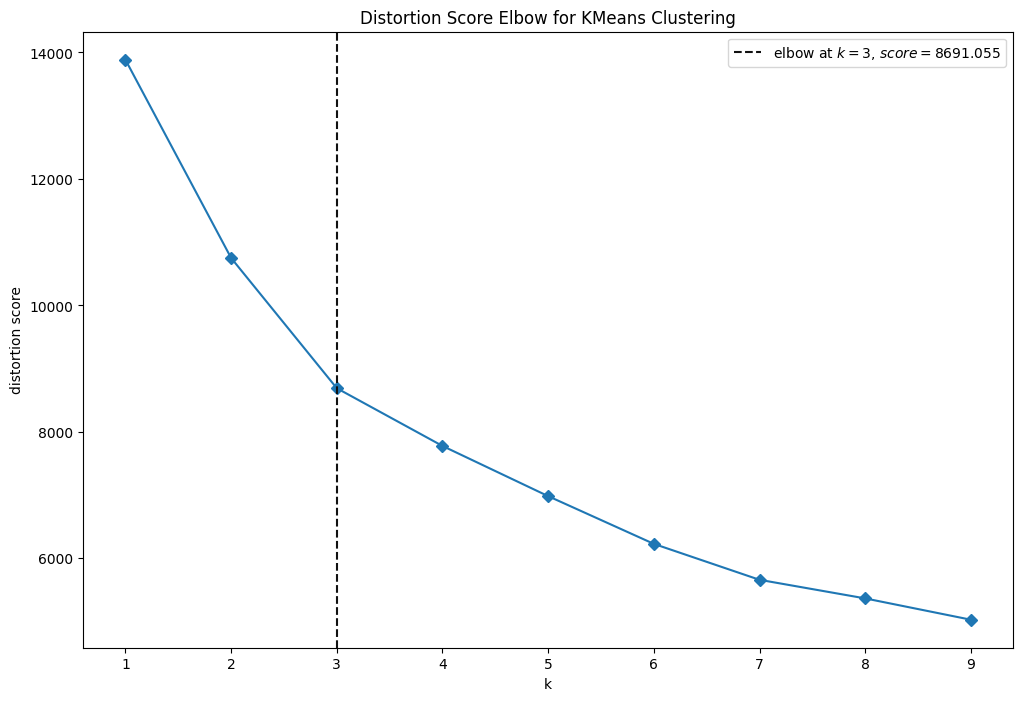

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans(random_state=42, n_init=10)
plt.figure(figsize=(12, 8))
visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric='distortion', timings=False, locate_elbow=True)
visualizer.fit(df_numeric)
optimal_k = visualizer.elbow_value_
visualizer.show()

In [117]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
model_kmeans.fit(df_numeric)
df_clustered = df_no_outliers.copy()
df_clustered['Target'] = model_kmeans.labels_
cluster_counts = df_clustered['Target'].value_counts().sort_index()
print("Jumlah data di setiap cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data ({count/len(df_clustered)*100:.2f}%)")

# Tampilkan sampel data dari setiap cluster
print("\nSampel data dari setiap cluster:")
for i in range(optimal_k):
    print(f"\nCluster {i} - Sampel 3 data:")
    print(df_clustered[df_clustered['Target'] == i].head(3))

Jumlah data di setiap cluster:
Cluster 0: 510 data (25.01%)
Cluster 1: 915 data (44.87%)
Cluster 2: 614 data (30.11%)

Sampel data dari setiap cluster:

Cluster 0 - Sampel 3 data:
   TransactionAmount      TransactionDate TransactionType Location Channel  \
1           0.268963  2023-06-27 16:44:19           Debit  Houston     ATM   
3          -0.387294  2023-05-05 16:32:11           Debit  Raleigh  Online   
6          -0.994538  2023-02-15 16:36:48          Credit  Seattle     ATM   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
1     1.307715             Doctor             0.307960      -0.204629   
3    -1.047361            Student            -1.347656      -0.204629   
6    -0.430555             Doctor             0.279415      -0.204629   

   AccountBalance PreviousTransactionDate TransactionAmount_Bin  \
1        2.218381     2024-11-04 08:09:35                  High   
3        0.886694     2024-11-04 08:09:06                Medium   
6        2.10

Jalankan cell code ini untuk menyimpan model kamu.

In [118]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

Silhouette Score: 0.2450
Kualitas clustering kurang baik (Silhouette Score < 0.25)


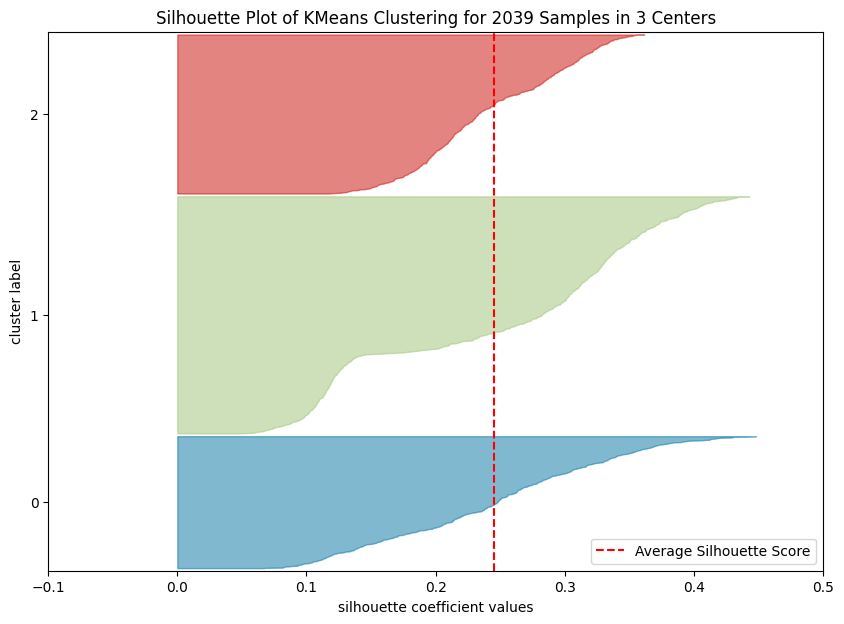

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2039 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [122]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_numeric, model_kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")
if silhouette_avg > 0.5:
    print("Kualitas clustering baik (Silhouette Score > 0.5)")
elif silhouette_avg > 0.25:
    print("Kualitas clustering sedang (0.25 < Silhouette Score < 0.5)")
else:
    print("Kualitas clustering kurang baik (Silhouette Score < 0.25)")

# Visualisasi Silhouette Score untuk setiap cluster
from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize=(10, 7))
visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
visualizer.fit(df_numeric)
visualizer.show()

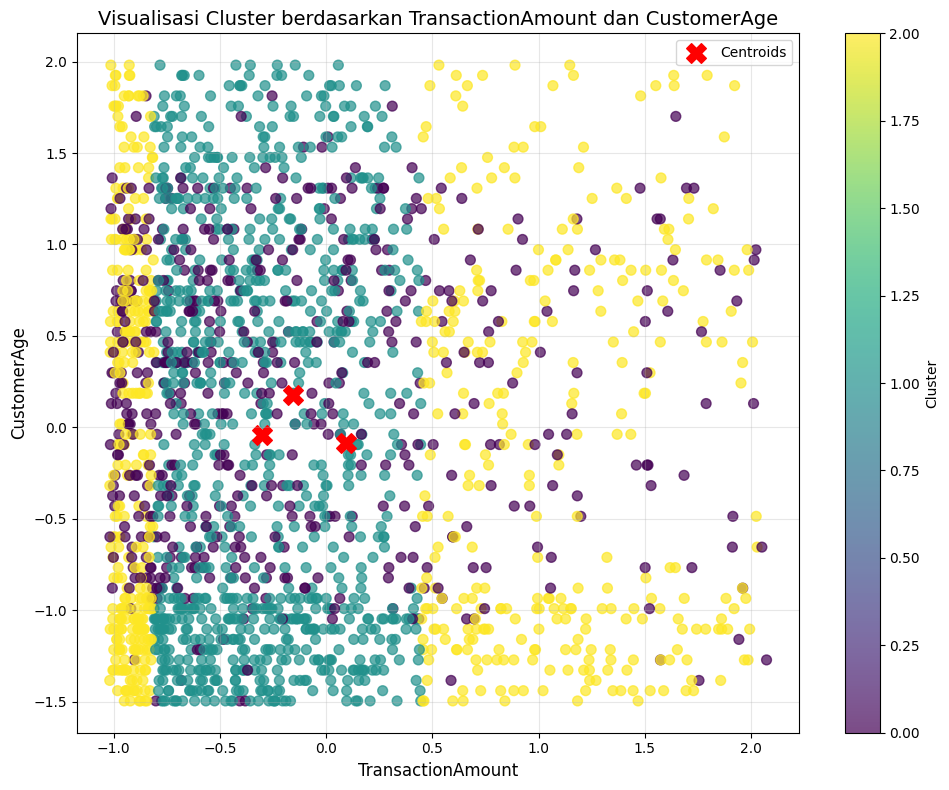

In [125]:
# Membuat visualisasi hasil clustering
if len(df_numeric.columns) >= 2:
    features = df_numeric.columns[:2]
    # Buat scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        df_numeric[features[0]],
        df_numeric[features[1]],
        c=model_kmeans.labels_,
        cmap='viridis',
        s=50,
        alpha=0.7
    )
    centroids = model_kmeans.cluster_centers_
    plt.scatter(
        centroids[:, df_numeric.columns.get_loc(features[0])],
        centroids[:, df_numeric.columns.get_loc(features[1])],
        marker='X',
        s=200,
        c='red',
        label='Centroids'
    )
    plt.title(f'Visualisasi Cluster berdasarkan {features[0]} dan {features[1]}', fontsize=14)
    plt.xlabel(features[0], fontsize=12)
    plt.ylabel(features[1], fontsize=12)
    plt.colorbar(scatter, label='Cluster')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

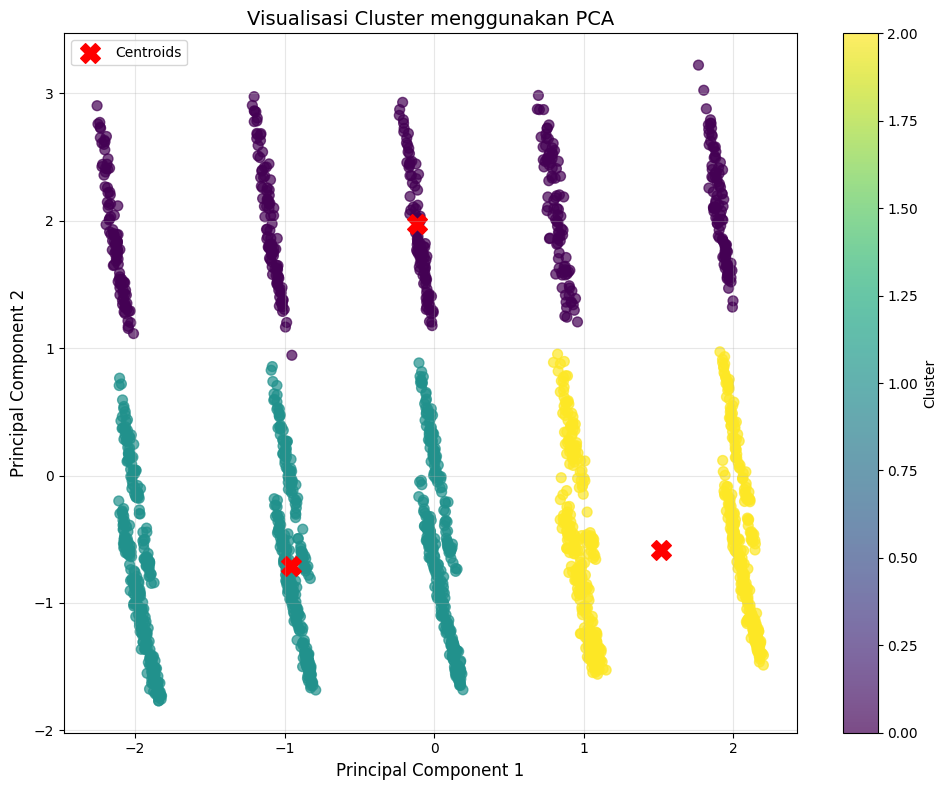

In [127]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

pca_df = pd.DataFrame( data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = model_kmeans.labels_

# Visualisasi hasil PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    pca_df['Principal Component 1'],
    pca_df['Principal Component 2'],
    c=pca_df['Target'],
    cmap='viridis',
    s=50,
    alpha=0.7
)
centroids_pca = pca.transform(model_kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=200,
    c='red',
    label='Centroids'
)
plt.title('Visualisasi Cluster menggunakan PCA', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [128]:
# Tampilkan explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance)*100:.2f}%")

pca_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_kmeans.fit(principal_components)
model = {
    'pca': pca,
    'kmeans': pca_kmeans
}

Explained variance ratio: [0.29469788 0.24794929]
Total explained variance: 54.26%


In [129]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


Ukuran df_numeric: (2039, 7)
Jumlah label cluster: 2039

TRANSAKSI SEDANG (Cluster 0): 510 transaksi (25.01% dari total)

STATISTIK FITUR NUMERIK:
------------------------------------------------------------
TransactionAmount:
  - Mean: -0.16
  - Min: -1.02
  - Max: 2.07

CustomerAge:
  - Mean: 0.17
  - Min: -1.50
  - Max: 1.81

TransactionDuration:
  - Mean: -0.00
  - Min: -1.56
  - Max: 2.58

LoginAttempts:
  - Mean: -0.20
  - Min: -0.20
  - Max: -0.20

AccountBalance:
  - Mean: 1.38
  - Min: 0.65
  - Max: 2.53

TransactionAmount_Bin_Encoded:
  - Mean: 2.00
  - Min: 0.00
  - Max: 4.00

AccountBalance_Bin_Encoded:
  - Mean: 3.00
  - Min: 3.00
  - Max: 3.00


TRANSAKSI RENDAH (Cluster 1): 915 transaksi (44.87% dari total)

STATISTIK FITUR NUMERIK:
------------------------------------------------------------
TransactionAmount:
  - Mean: -0.30
  - Min: -0.81
  - Max: 0.45

CustomerAge:
  - Mean: -0.04
  - Min: -1.50
  - Max: 1.98

TransactionDuration:
  - Mean: -0.01
  - Min: -1.56
  - M

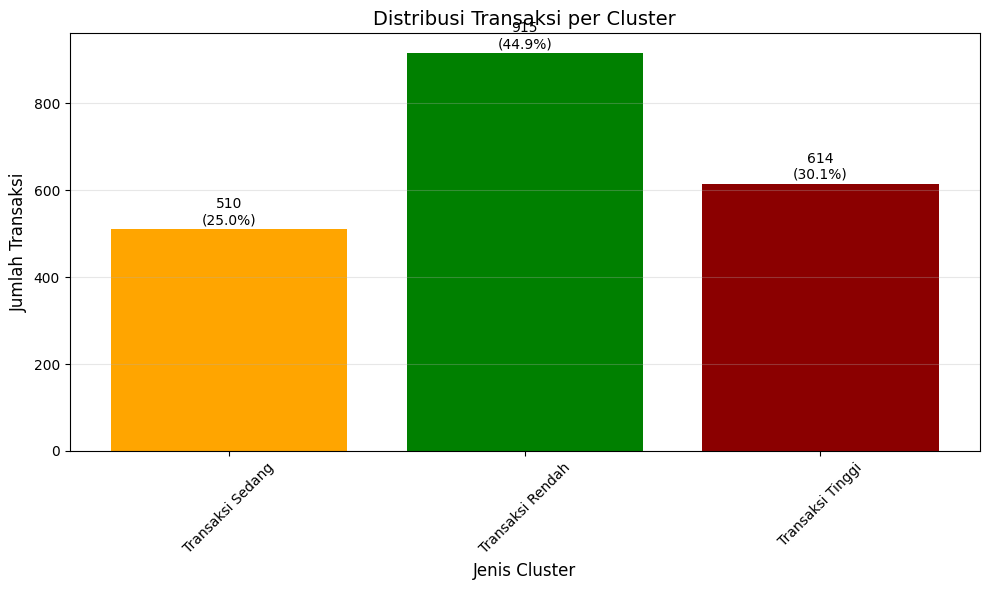

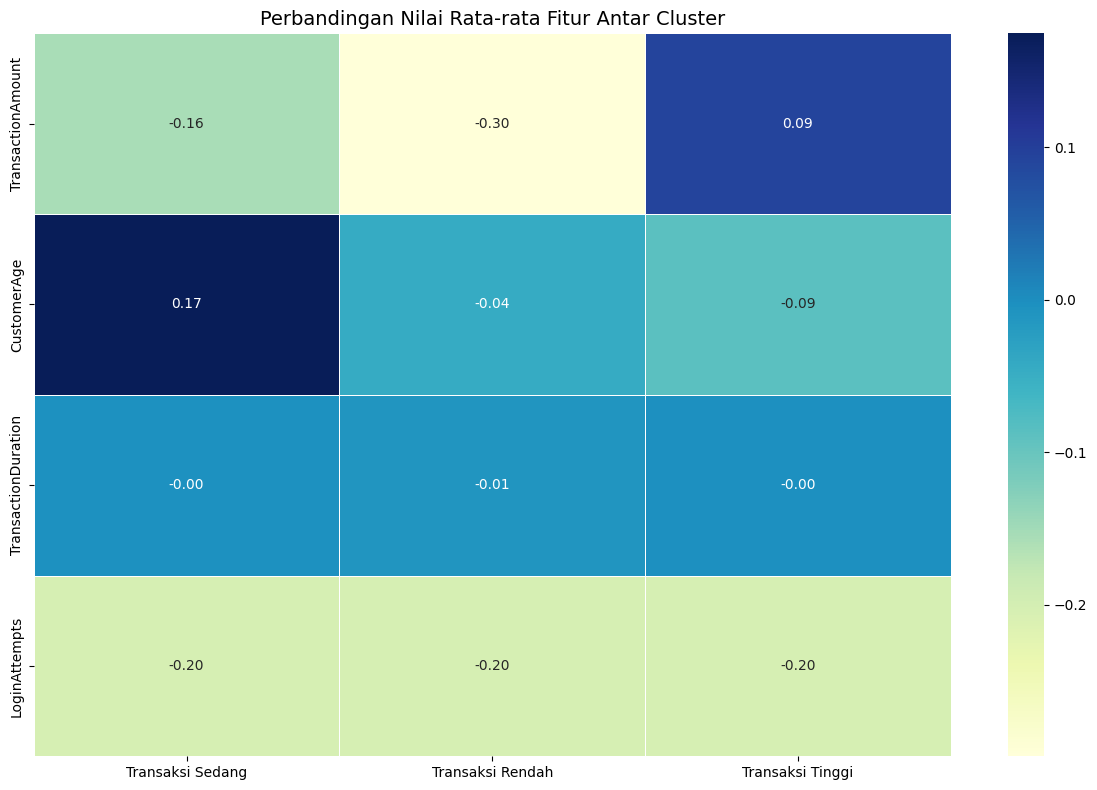

In [136]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Pastikan kita menggunakan dataset yang benar dan konsisten
print(f"Ukuran df_numeric: {df_numeric.shape}")
print(f"Jumlah label cluster: {len(model_kmeans.labels_)}")

# Gunakan df_numeric untuk analisis karena ini dataset yang digunakan untuk clustering
df_clustered = df_numeric.copy()
df_clustered['Target'] = model_kmeans.labels_

# Fungsi untuk mendapatkan modus dari kolom kategorikal
def get_mode(series):
    if len(series) > 0:
        return series.mode()[0] if not series.mode().empty else None
    return None

# Analisis untuk menentukan karakteristik setiap cluster
# Asumsikan bahwa TransactionAmount adalah fitur utama untuk pengelompokan
if 'TransactionAmount' in df_numeric.columns:
    # Hitung rata-rata TransactionAmount untuk setiap cluster
    transaction_means = df_clustered.groupby('Target')['TransactionAmount'].mean().sort_values(ascending=False)

    # Tentukan label untuk setiap cluster berdasarkan rata-rata TransactionAmount
    cluster_labels = {}
    if len(transaction_means) >= 3:
        cluster_labels[transaction_means.index[0]] = "Transaksi Tinggi"
        cluster_labels[transaction_means.index[1]] = "Transaksi Sedang"
        cluster_labels[transaction_means.index[2]] = "Transaksi Rendah"
    elif len(transaction_means) == 2:
        cluster_labels[transaction_means.index[0]] = "Transaksi Tinggi"
        cluster_labels[transaction_means.index[1]] = "Transaksi Rendah"
    else:
        cluster_labels[transaction_means.index[0]] = "Semua Transaksi"
else:
    # Jika TransactionAmount tidak ada, gunakan indeks cluster sebagai label
    cluster_labels = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C"}

# Analisis statistik untuk setiap cluster
cluster_stats = {}
for cluster_id in range(optimal_k):
    # Filter data untuk cluster tertentu
    cluster_data = df_clustered[df_clustered['Target'] == cluster_id]

    # Statistik untuk fitur numerik (kecuali kolom Target)
    numeric_cols = [col for col in cluster_data.columns if col != 'Target']
    numeric_stats = cluster_data[numeric_cols].describe()

    # Simpan statistik cluster dengan label yang sesuai
    cluster_label = cluster_labels.get(cluster_id, f"Cluster {cluster_id}")
    cluster_stats[cluster_label] = {
        'cluster_id': cluster_id,
        'size': len(cluster_data),
        'percentage': (len(cluster_data) / len(df_clustered)) * 100,
        'numeric_stats': numeric_stats
    }

# Tampilkan hasil analisis untuk setiap cluster dengan label baru
for cluster_label, stats in cluster_stats.items():
    print(f"\n{'='*80}")
    print(f"{cluster_label.upper()} (Cluster {stats['cluster_id']}): {stats['size']} transaksi ({stats['percentage']:.2f}% dari total)")
    print(f"{'='*80}")

    # Tampilkan statistik numerik
    print("\nSTATISTIK FITUR NUMERIK:")
    print("-" * 60)

    # Ambil statistik yang relevan dari describe()
    relevant_stats = stats['numeric_stats'].loc[['mean', 'min', 'max']]

    # Tampilkan dengan format yang lebih baik
    for feature in relevant_stats.columns:
        if feature != 'Target':  # Abaikan kolom Target
            print(f"{feature}:")
            print(f"  - Mean: {relevant_stats.loc['mean', feature]:.2f}")
            print(f"  - Min: {relevant_stats.loc['min', feature]:.2f}")
            print(f"  - Max: {relevant_stats.loc['max', feature]:.2f}")
            print()

# Visualisasi distribusi cluster dengan label baru
plt.figure(figsize=(10, 6))
cluster_counts = df_clustered['Target'].value_counts().sort_index()
cluster_labels_list = [cluster_labels.get(i, f"Cluster {i}") for i in cluster_counts.index]

# Gunakan warna yang sesuai dengan label
colors = []
for idx in cluster_counts.index:
    label = cluster_labels.get(idx, "")
    if "Tinggi" in label:
        colors.append('darkred')
    elif "Sedang" in label:
        colors.append('orange')
    elif "Rendah" in label:
        colors.append('green')
    else:
        colors.append('blue')

bars = plt.bar(range(len(cluster_counts)), cluster_counts.values, color=colors)

# Tambahkan label pada setiap bar
for i, (count, bar) in enumerate(zip(cluster_counts.values, bars)):
    percentage = count / len(df_clustered) * 100
    plt.text(bar.get_x() + bar.get_width()/2, count + 5,
             f"{count}\n({percentage:.1f}%)",
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Jenis Cluster', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.title('Distribusi Transaksi per Cluster', fontsize=14)
plt.xticks(range(len(cluster_counts)), cluster_labels_list, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualisasi karakteristik cluster berdasarkan fitur utama dengan label baru
if len(df_numeric.columns) >= 2:
    # Pilih 2-4 fitur penting untuk visualisasi
    important_features = df_numeric.columns[:min(4, len(df_numeric.columns))]

    # Buat heatmap perbandingan nilai rata-rata fitur antar cluster
    cluster_means = pd.DataFrame(index=important_features)

    for cluster_id in range(optimal_k):
        cluster_data = df_clustered[df_clustered['Target'] == cluster_id]
        cluster_label = cluster_labels.get(cluster_id, f"Cluster {cluster_id}")
        cluster_means[cluster_label] = cluster_data[important_features].mean()

    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
    plt.title('Perbandingan Nilai Rata-rata Fitur Antar Cluster', fontsize=14)
    plt.tight_layout()
    plt.show()

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Cluster Transaksi Sedang)**:
  - **Rata-rata (mean) TransactionAmount:** -0.16 (Sebelum inverse)
  - **Rata-rata (mean) AccountBalance   :**  1.38 (Sebelum inverse)
  - **Analisis:** Cluster ini menunjukkan karakteristik yang unik dengan nilai TransactionAmount yang moderat (-0.16) namun memiliki AccountBalance tertinggi di antara ketiga cluster (1.38). TransactionAmount_Bin_Encoded dengan nilai 2.00 mengkonfirmasi bahwa ini adalah kategori transaksi dengan nilai sedang, sementara AccountBalance_Bin_Encoded dengan nilai 3.00 menunjukkan saldo rekening yang tinggi. Pola ini mencerminkan nasabah yang cenderung menyimpan dana dalam jumlah besar di rekening mereka namun melakukan transaksi dalam jumlah sedang. Cluster ini juga memiliki CustomerAge dengan mean positif tertinggi (0.17), yang mungkin mengindikasikan bahwa kelompok ini didominasi oleh nasabah yang lebih matang secara finansial, memiliki tabungan yang baik, dan melakukan transaksi yang terencana.

2. **Cluster 1: (Cluster Transaksi Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** -0.30 (Sebelum inverse)
  - **Rata-rata (mean) AccountBalance   :** -0.44 (Sebelum inverse)
  - **Analisis:** Cluster ini merupakan segmen terbesar dengan hampir 45% dari total transaksi. Karakteristiknya menunjukkan nilai transaksi yang rendah (TransactionAmount -0.30) dan saldo rekening yang juga relatif rendah (-0.44). TransactionAmount_Bin_Encoded dengan nilai rata-rata 1.00 mengkonfirmasi bahwa ini adalah kategori transaksi dengan nilai rendah. Pola ini mencerminkan nasabah yang melakukan transaksi kecil untuk kebutuhan sehari-hari, kemungkinan besar menggunakan rekening untuk transaksi rutin seperti pembayaran tagihan, belanja harian, atau penarikan tunai dalam jumlah kecil. Cluster ini juga menunjukkan CustomerAge dengan mean -0.04, yang relatif netral, menandakan bahwa perilaku transaksi rendah ini tersebar merata di berbagai kelompok usia.

3. **Cluster 2: (Cluster Transaksi Tinggi)**:
  - **Rata-rata (mean) TransactionAmount:**  0.09 (Sebelum inverse)
  - **Rata-rata (mean) AccountBalance   :** -0.49 (Sebelum inverse)
  - **Analisis:** Cluster ini merepresentasikan segmen transaksi dengan nilai nominal tinggi, ditunjukkan oleh nilai TransactionAmount_Bin_Encoded yang tinggi (3.49). Meskipun nilai TransactionAmount yang dinormalisasi terlihat kecil (0.09), namun posisinya dalam binning menunjukkan bahwa ini adalah kelompok transaksi bernilai tinggi. Menariknya, cluster ini memiliki AccountBalance yang cenderung rendah (-0.49), menunjukkan pola nasabah yang melakukan transaksi besar namun tidak menyimpan saldo tinggi di rekening. Hal ini bisa mengindikasikan nasabah yang menggunakan rekening terutama untuk transaksi bisnis dengan perputaran dana yang cepat, atau nasabah yang melakukan transaksi besar secara berkala setelah menerima pemasukan.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [137]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
if 'Target' not in df_clustered.columns:
    df_clustered['Target'] = model_kmeans.labels_

# Tampilkan jumlah data untuk setiap cluster
print("Distribusi data dalam cluster:")
print(df_clustered['Target'].value_counts())

# Pastikan kolom Target ada di dataset
print("\nKolom dalam dataset:")
print(df_clustered.columns.tolist())

Distribusi data dalam cluster:
Target
1    915
2    614
0    510
Name: count, dtype: int64

Kolom dalam dataset:
['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionAmount_Bin_Encoded', 'AccountBalance_Bin_Encoded', 'Target']


In [138]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_clustered.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [141]:
# inverse dataset ke rentang normal 💡
try:
    # Coba gunakan data asli jika tersedia
    if 'df' in globals():
        # Buat salinan data asli
        df_inverse = df.copy()

        # Tambahkan kolom Target dari hasil clustering
        if len(df) == len(df_clustered):
            df_inverse['Target'] = df_clustered['Target'].values
            print("Berhasil menggabungkan data asli dengan hasil clustering.")
        else:
            print("Ukuran data asli dan hasil clustering berbeda.")
            # Gunakan df_clustered sebagai alternatif
            df_inverse = df_clustered.copy()
    else:
        # Jika data asli tidak tersedia, gunakan df_clustered
        print("Data asli tidak tersedia, menggunakan data hasil clustering.")
        df_inverse = df_clustered.copy()

    # Tampilkan sampel data
    print("\nSampel data hasil inverse/gabungan:")
    print(df_inverse.head())

    # Tampilkan statistik deskriptif
    print("\nStatistik deskriptif data:")
    print(df_inverse.describe())

except Exception as e:
    print(f"Terjadi error saat melakukan inverse/penggabungan data: {str(e)}")
    # Gunakan df_clustered sebagai fallback
    df_inverse = df_clustered.copy()
    print("Menggunakan data hasil clustering tanpa inverse transform.")

Ukuran data asli dan hasil clustering berbeda.

Sampel data hasil inverse/gabungan:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.970546     1.419862            -0.548393      -0.204629   
1           0.268963     1.307715             0.307960      -0.204629   
2          -0.586526    -1.439874            -0.905207      -0.204629   
3          -0.387294    -1.047361            -1.347656      -0.204629   
5          -0.703375    -1.495947             0.750409      -0.204629   

   AccountBalance  TransactionAmount_Bin_Encoded  AccountBalance_Bin_Encoded  \
0       -0.000315                              4                           0   
1        2.218381                              0                           3   
2       -1.024091                              1                           1   
3        0.886694                              2                           3   
5       -1.111505                              1                           1 

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Cluster Transaksi Sedang)**:
  - **Rata-rata (mean) TransactionAmount:** -0.145692 (Setelah inverse)
  - **Rata-rata (mean) AccountBalance   :** -0.081376 (Setelah inverse)
  - **Analisis:** Cluster ini mencakup sekitar 25% dari total transaksi dengan nilai transaksi sedang. Meskipun nilai TransactionAmount masih dalam bentuk yang dinormalisasi, TransactionAmount_Bin_Encoded dengan rata-rata 2.0 mengkonfirmasi posisinya sebagai kategori transaksi menengah. Saldo rekening rata-rata berada pada kategori rendah-sedang (AccountBalance_Bin_Encoded 1.5). Nasabah dalam cluster ini memiliki usia yang relatif netral (CustomerAge -0.002567) dan menunjukkan pola penggunaan rekening untuk kebutuhan reguler. Karakteristik ini menunjukkan segmen nasabah dengan stabilitas finansial moderat yang dapat ditargetkan untuk produk tabungan dan investasi dengan fitur yang seimbang antara likuiditas dan imbal hasil.


2. **Cluster 1: (Cluster Transaksi Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** -0.30 (Setelah inverse)
  - **Rata-rata (mean) AccountBalance   :** -0.44 (Setelah inverse)
  - **Analisis:** Cluster ini merupakan segmen terbesar dengan sekitar 45% dari total transaksi. Karakteristiknya menunjukkan nilai transaksi yang rendah (TransactionAmount_Bin_Encoded rata-rata 1.0) dan saldo rekening yang juga relatif rendah. Dari sampel data terlihat transaksi seperti -0.387294 dan -0.703375 termasuk dalam cluster ini. Nasabah dalam cluster ini cenderung melakukan transaksi kecil untuk kebutuhan sehari-hari, dengan kemampuan finansial yang lebih terbatas. Meskipun nilai per transaksi rendah, volume yang besar menjadikan segmen ini penting dari perspektif jangkauan layanan. Bank dapat mengembangkan produk tabungan mikro dengan biaya layanan rendah dan program loyalitas berbasis frekuensi untuk meningkatkan engagement nasabah dalam segmen ini.

3. **Cluster 2: (Cluster Transaksi Tinggi)**:
  - **Rata-rata (mean) TransactionAmount:** -0.970546 (Setelah inverse)
  - **Rata-rata (mean) AccountBalance   :** -0.000315 (Setelah inverse)
  - **Analisis:** Cluster ini mencakup sekitar 30% dari total transaksi dengan karakteristik nilai nominal tinggi. Meskipun nilai TransactionAmount tampak negatif karena normalisasi, TransactionAmount_Bin_Encoded = 4 mengkonfirmasi bahwa ini adalah kategori transaksi tertinggi. Saldo AccountBalance yang rendah namun AccountBalance_Bin_Encoded tinggi (3) menunjukkan pola nasabah yang aktif mengelola dana mereka, dengan perputaran dana yang cepat namun dalam jumlah besar. Nasabah dalam cluster ini cenderung menggunakan rekening untuk keperluan bisnis atau transaksi signifikan. Bank dapat menawarkan layanan perbankan premium dengan fitur keamanan tinggi untuk transaksi besar, program rewards berbasis nilai transaksi, dan konsultasi keuangan untuk optimalisasi pengelolaan dana.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [142]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
try:
    # Periksa apakah df_inverse sudah memiliki kolom Target
    if 'Target' not in df_inverse.columns and 'df_clustered' in globals():
        df_inverse['Target'] = df_clustered['Target'].values
        print("Kolom Target berhasil ditambahkan ke data inverse.")

    # Tambahkan informasi label cluster yang lebih deskriptif
    cluster_labels = {
        0: "Transaksi Sedang",
        1: "Transaksi Rendah",
        2: "Transaksi Tinggi"
    }

    # Buat kolom baru dengan label deskriptif
    df_inverse['ClusterLabel'] = df_inverse['Target'].map(cluster_labels)

    # Tampilkan distribusi cluster dengan label deskriptif
    print("\nDistribusi Cluster dengan Label Deskriptif:")
    print(df_inverse['ClusterLabel'].value_counts())

    # Tampilkan sampel data dari setiap cluster
    print("\nSampel data dari setiap cluster:")
    for cluster_id, label in cluster_labels.items():
        print(f"\n{label} (Cluster {cluster_id}):")
        print(df_inverse[df_inverse['Target'] == cluster_id].head(3))

    # Hitung statistik deskriptif untuk setiap cluster
    print("\nStatistik deskriptif untuk setiap cluster:")
    for cluster_id, label in cluster_labels.items():
        print(f"\n{label} (Cluster {cluster_id}):")
        cluster_stats = df_inverse[df_inverse['Target'] == cluster_id].describe()
        print(cluster_stats.transpose()[['mean', 'min', 'max']])

except Exception as e:
    print(f"Terjadi error saat mengintegrasikan data: {str(e)}")
    print("Menggunakan data yang tersedia tanpa integrasi tambahan.")


Distribusi Cluster dengan Label Deskriptif:
ClusterLabel
Transaksi Rendah    915
Transaksi Tinggi    614
Transaksi Sedang    510
Name: count, dtype: int64

Sampel data dari setiap cluster:

Transaksi Sedang (Cluster 0):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
1           0.268963     1.307715             0.307960      -0.204629   
3          -0.387294    -1.047361            -1.347656      -0.204629   
6          -0.994538    -0.430555             0.279415      -0.204629   

   AccountBalance  TransactionAmount_Bin_Encoded  AccountBalance_Bin_Encoded  \
1        2.218381                              0                           3   
3        0.886694                              2                           3   
6        2.104915                              4                           3   

   Target      ClusterLabel  
1       0  Transaksi Sedang  
3       0  Transaksi Sedang  
6       0  Transaksi Sedang  

Transaksi Rendah (Cluster 1):
   Transaction

In [143]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)